# <font color='navy'> Data Analysis of the 1998 Freezing Rain Event
## <font color='navy'> AOS 573 Final Project
### <font color='navy'> By: Noah Alviz

# GOAL/METHODS: 

The goal of this project is to analyze the January 1998 freezing rain event that hit the Northeastern U.S. and Southeastern Canada. I mainly want to analyze temperature and precipitation in this region. I will look at temperature horizontally and vertically, and look at precipitation totals over this region. By doing this analysis, I hope to verify the conditions that made freezing rain possible.

# DATA TO BE USED:

#### Temperature data:

##### For vertical profiles of temperature (skew-Ts):

- Unviersity of Wyoming
- http://weather.uwyo.edu/upperair/sounding.html
- For type of plot, select "text: list", then put the appropriate dates/times, and then pick a location to retrieve temperature and dewpoint data
- Focusing on Maniwaki, Québec, Canada since this is the available location in the sounding archives that is closest to the freezing rain event in northeast U.S. and southeast Canada
- Focus on these dates/times: Jan 5th 00Z, Jan 5th 12Z, Jan 6th 00Z, Jan 6th 12Z, Jan 7th 00Z, Jan 7th 12Z (all the year 1998)
- Save this data as a .txt file

##### For horizontal profiles of temperature (contour plots):

- https://psl.noaa.gov/cgi-bin/db_search/DBListFiles.pl?did=195&tid=96658&vid=13 (link to the data)
- Download the netcdf data called "air.1998.nc"
- Focus on 1000 hpa, 850 hpa, 700 hpa
- Focus on these lat: 35°N to 55°N
- Focus on these lon: -90°W, -60°W

#### Precipitation data:

- https://downloads.psl.noaa.gov/Datasets/cpc_global_precip/ (link to the data)
- Download the netcdf data called "precip.1998.nc"
- Focus on these dates: Jan 4th-7th
- Focus on these lat: 35°N to 55°N
- Focus on these lon: -90°W, -60°W

# IMPORT MODULES

In [1]:
#numpy
import numpy as np
#matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mplc
import matplotlib as mpl
import matplotlib.gridspec as gridspec
#pandas
import pandas as pd
#xarray
import xarray as xr
#metpy
from metpy.units import units
from metpy.plots import SkewT
#cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

# AIR TEMPERATURE CONTOUR PLOT

#### Load the netcdf data set of air temperature

In [2]:
#use xarray to open the air temperature dataset
ds1 = xr.open_dataset('air.1998.nc')
#print out the dataset
ds1

<xarray.Dataset>
Dimensions:  (level: 17, lat: 73, lon: 144, time: 1460)
Coordinates:
  * level    (level) float32 1e+03 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1998-01-01 ... 1998-12-31T18:00:00
Data variables:
    air      (time, level, lat, lon) float32 ...
Attributes:
    Conventions:    COARDS
    title:          4x daily NMC reanalysis (1998)
    description:    Data is from NMC initialized reanalysis\n(4x/day).  It co...
    platform:       Model
    history:        created 98/02/12 by Hoop (netCDF2.3)\nConverted to chunke...
    dataset_title:  NCEP-NCAR Reanalysis 1
    References:     http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis...

#### Extract latitude, longitude, and temperatures for the appropriate time and pressure levels

In [3]:
lat = ds1.lat
lon = ds1.lon
temp_1000 = ds1.air.sel(time='1998-01-06T12:00:00.000000000',level=1000.0)-273.15 #convert to celsius
temp_850 = ds1.air.sel(time='1998-01-06T12:00:00.000000000',level=850.0)-273.15 #convert to celsius
temp_700 = ds1.air.sel(time='1998-01-06T12:00:00.000000000',level=700.0)-273.15 #convert to celsius

#### Change the font

In [4]:
mpl.rcParams['font.family'] = 'monospace'

#### Plot

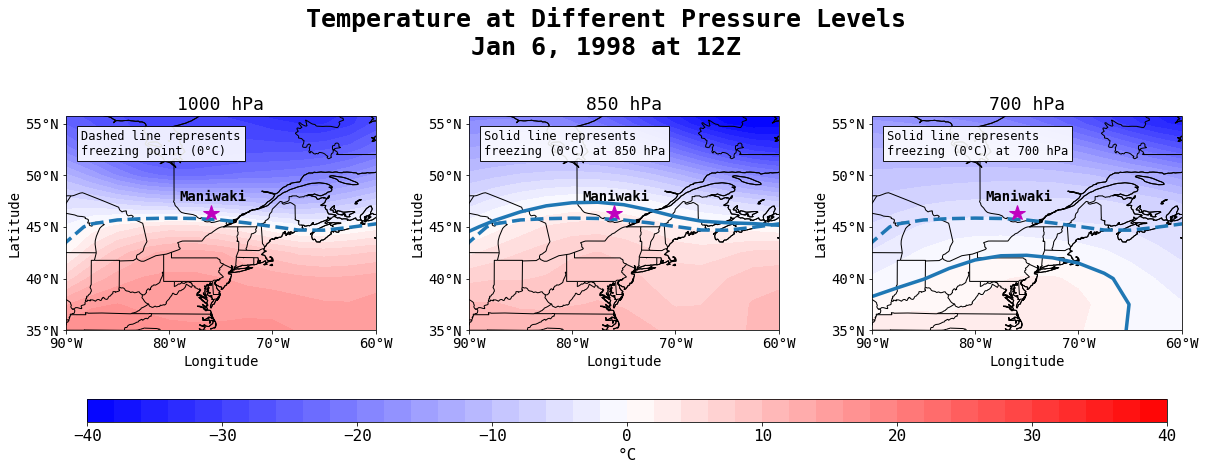

In [5]:
#create figure
fig=plt.figure(figsize=(20,16))

#create subplots
ax1=fig.add_subplot(131,projection=ccrs.PlateCarree())
ax2=fig.add_subplot(132,projection=ccrs.PlateCarree())
ax3=fig.add_subplot(133,projection=ccrs.PlateCarree())

#add provinces
provinces_50m = cfeature.NaturalEarthFeature('cultural','admin_1_states_provinces_lines','50m',facecolor='none')

#create filled contours and freezing line (1000 hPa)
csf = ax1.contourf(lon,lat,temp_1000,cmap='bwr',levels = np.arange(-40, 40 + 2, 2))
cs = ax1.contour(lon, lat,temp_1000,levels = [0],colors=('C0',),linestyles='--',linewidths=(3.5,))

#labeling
ax1.clabel(cs, inline=False, fmt='%1.1d', fontsize=10)
ax1.set_xlabel('Longitude',fontsize=14)
ax1.set_ylabel('Latitude',fontsize=14)
ax1.set_title('1000 hPa',fontsize=18)
ax1.coastlines(color='black')
ax1.set_extent([-90, -60, 35, 55])
ax1.add_feature(cfeature.OCEAN)
ax1.add_feature(cfeature.BORDERS)
ax1.add_feature(cfeature.COASTLINE)
ax1.add_feature(provinces_50m)
x_ticks = ax1.set_xticks(np.arange(-90,-59,10),crs=ccrs.PlateCarree())
y_ticks = ax1.set_yticks([35,40,45,50,55],crs=ccrs.PlateCarree())
ax1.set_xticklabels(x_ticks, fontsize=14)
ax1.set_yticklabels(y_ticks, fontsize=14)
ax1.xaxis.set_major_formatter(LongitudeFormatter())
ax1.yaxis.set_major_formatter(LatitudeFormatter())
ax1.plot(284.04,46.3775,'*m',transform=ccrs.PlateCarree(),markersize=16)
ax1.text(284.04-3,47.5,'Maniwaki',transform=ccrs.PlateCarree(),fontweight='bold',fontsize=14)
ax1.text(-88.5,52, 'Dashed line represents\nfreezing point (0°C)' ,fontsize=12,
        bbox={'facecolor': 'white', 'alpha': 0.9})

#create filled contours and freezing lines (850 hPa)
ax2.contourf(lon,lat,temp_850,cmap='bwr',levels = np.arange(-40, 40 + 2, 2))
ax2.contour(lon,lat,temp_850,levels = [0],colors=('C0',),linestyles='-',linewidths=(3.5,)) #freezing line for 850 hpa
ax2.contour(lon, lat,temp_1000,levels = [0],colors=('C0',),linestyles='--',linewidths=(3.5,)) #freezing line for 1000 hpa

#labeling
ax2.clabel(cs, inline=False, fmt='%1.1d', fontsize=10)
ax2.set_xlabel('Longitude',fontsize=14)
ax2.set_ylabel('Latitude',fontsize=14)
ax2.set_title('850 hPa',fontsize=18)
ax2.coastlines(color='black')
ax2.set_extent([-90, -60, 35, 55])
ax2.add_feature(cfeature.OCEAN)
ax2.add_feature(cfeature.BORDERS)
ax2.add_feature(cfeature.COASTLINE)
ax2.add_feature(provinces_50m)
x_ticks = ax2.set_xticks(np.arange(-90,-59,10),crs=ccrs.PlateCarree())
y_ticks = ax2.set_yticks([35,40,45,50,55],crs=ccrs.PlateCarree())
ax2.set_xticklabels(x_ticks, fontsize=14)
ax2.set_yticklabels(y_ticks, fontsize=14)
ax2.xaxis.set_major_formatter(LongitudeFormatter())
ax2.yaxis.set_major_formatter(LatitudeFormatter())
ax2.plot(284.04,46.3775,'*m',transform=ccrs.PlateCarree(),markersize=16)
ax2.text(284.04-3,47.5,'Maniwaki',transform=ccrs.PlateCarree(),fontweight='bold',fontsize=14)
ax2.text(-88.5,52, 'Solid line represents\nfreezing (0°C) at 850 hPa',fontsize=12,
        bbox={'facecolor': 'white', 'alpha': 0.9})

#create filled contours and freezing lines (700 hPa)
ax3.contourf(lon,lat,temp_700,cmap='bwr',levels = np.arange(-40, 40 + 2, 2))
ax3.contour(lon,lat,temp_700,levels = [0],colors=('C0',),linestyles='-',linewidths=(3.5,)) #freezing line for 700 hpa
ax3.contour(lon, lat,temp_1000,levels = [0],colors=('C0',),linestyles='--',linewidths=(3.5,)) #freezing line for 1000 hpa

#labeling
ax3.clabel(cs, inline=False, fmt='%1.1d', fontsize=10)
ax3.set_xlabel('Longitude',fontsize=14)
ax3.set_ylabel('Latitude',fontsize=14)
ax3.set_title('700 hPa',fontsize=18)
ax3.coastlines(color='black')
ax3.set_extent([-90, -60, 35, 55])
ax3.add_feature(cfeature.OCEAN)
ax3.add_feature(cfeature.BORDERS)
ax3.add_feature(cfeature.COASTLINE)
ax3.add_feature(provinces_50m)
x_ticks = ax3.set_xticks(np.arange(-90,-59,10),crs=ccrs.PlateCarree())
y_ticks = ax3.set_yticks([35,40,45,50,55],crs=ccrs.PlateCarree())
ax3.set_xticklabels(x_ticks, fontsize=14)
ax3.set_yticklabels(y_ticks, fontsize=14)
ax3.xaxis.set_major_formatter(LongitudeFormatter())
ax3.yaxis.set_major_formatter(LatitudeFormatter())
ax3.plot(284.04,46.3775,'*m',transform=ccrs.PlateCarree(),markersize=16)
ax3.text(284.04-3,47.5,'Maniwaki',transform=ccrs.PlateCarree(),fontweight='bold',fontsize=14)
ax3.text(-88.5,52, 'Solid line represents\nfreezing (0°C) at 700 hPa',fontsize=12,
        bbox={'facecolor': 'white', 'alpha': 0.9})

#create a colorbar
cax=fig.add_axes([0.14,0.33,0.75,0.02]) #Left, bottom, width, height
cbar=plt.colorbar(csf,cax=cax,orientation='horizontal')
cbar.ax.set_xlabel('°C',fontsize=16)
cbar.ax.tick_params(labelsize=16)

#title
plt.suptitle('Temperature at Different Pressure Levels\nJan 6, 1998 at 12Z',fontsize=25,fontweight='bold',y=0.69)
plt.subplots_adjust(wspace=0.30, hspace=0.08)

#save the figure
plt.savefig('maniwaki_temp_contour.png', bbox_inches='tight', dpi=300)

These subplots are showing the temperatures at different pressure levels (1000 hpa, 850 hpa, 700 hpa) during the Jan 1998 ice storm that hit the Northeastern U.S. and Southeastern Canada. The dashed line in these subplots represent the freezing line at 1000 hpa. The solid lines in the 850 hpa and 700 hpa plots represent the freezing line at those pressure levels. I included the 1000 hpa freezing line in the 850 hpa and 700 hpa plots to compare how the freezing line changes as you go higher up in the atmosphere. From these figures, we see that Maniwaki is below freezing at 1000 hpa, above freezing at 850 hpa, and below freezing at 700 hpa. This sort of temperature profile is consistent with that of freezing rain, so if there's enough moisture we can infer that freezing rain is occurring at this time.

# PRECIPITATION CONTOUR PLOT

#### Load the netcdf data set of precipitation

In [6]:
#use xarray to open the precipitation dataset
ds2 = xr.open_dataset('precip.1998.nc')
#print out the dataset
ds2

<xarray.Dataset>
Dimensions:  (lat: 360, lon: 720, time: 365)
Coordinates:
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 0.25 0.75 1.25 1.75 2.25 ... 358.2 358.8 359.2 359.8
  * time     (time) datetime64[ns] 1998-01-01 1998-01-02 ... 1998-12-31
Data variables:
    precip   (time, lat, lon) float32 ...
Attributes:
    Conventions:    CF-1.0
    version:        V1.0
    history:        created 9/2016 by CAS NOAA/ESRL PSD
    title:          CPC GLOBAL PRCP V1.0
    dataset_title:  CPC GLOBAL PRCP V1.0
    Source:         ftp://ftp.cpc.ncep.noaa.gov/precip/CPC_UNI_PRCP/
    References:     https://www.psl.noaa.gov/data/gridded/data.cpc.globalprec...

#### Extract latitude, longitude, and precipitation for the appropriate times and convert from mm to inches

In [7]:
lat = ds2.lat
lon = ds2.lon
#Convert from mm to inches
precip_jan4 = ds2.precip.sel(time='1998-01-04T00:00:00.000000000')/25.4
precip_jan5 = ds2.precip.sel(time='1998-01-05T00:00:00.000000000')/25.4
precip_jan6 = ds2.precip.sel(time='1998-01-06T00:00:00.000000000')/25.4
precip_jan7 = ds2.precip.sel(time='1998-01-07T00:00:00.000000000')/25.4

#### Create a colorblind-friendly color bar

In [8]:
cmap=mplc.ListedColormap(['#ffffe0','#c5eddf','#a5d5d8','#8abccf','#73a2c6','#5d8abd','#4771b2','#2e59a8','#00429d'])

#### Plot

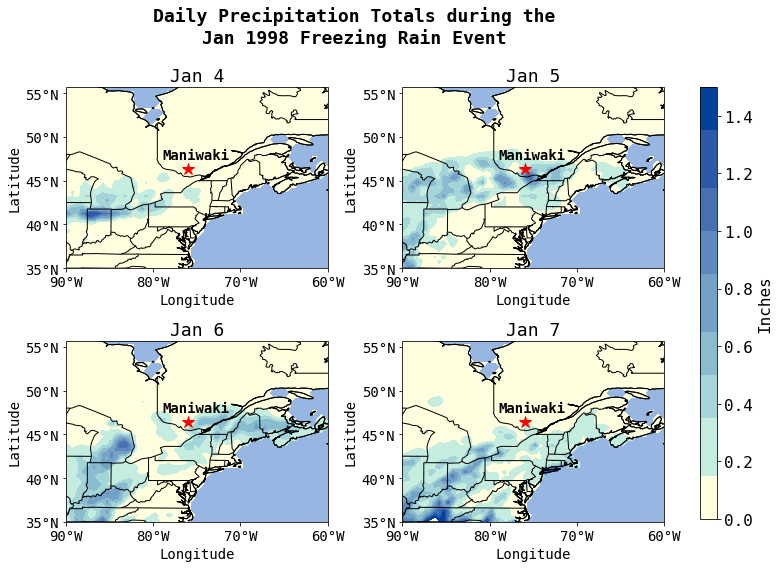

In [9]:
#create figure
fig=plt.figure(figsize=(12,8))

#create subplots
ax4=fig.add_subplot(221,projection=ccrs.PlateCarree())
ax5=fig.add_subplot(222,projection=ccrs.PlateCarree())
ax6=fig.add_subplot(223,projection=ccrs.PlateCarree())
ax7=fig.add_subplot(224,projection=ccrs.PlateCarree())

#create filled contour plot of precip (Jan 4th)
csf = ax4.contourf(lon,lat,precip_jan4,cmap=cmap,levels = np.arange(0, 1.51, 0.05))

#labeling
ax4.set_xlabel('Longitude',fontsize=14)
ax4.set_ylabel('Latitude',fontsize=14)
ax4.set_title('Jan 4',fontsize=18)
ax4.coastlines(color='black')
ax4.set_extent([-90, -60, 35, 55])
ax4.add_feature(cfeature.OCEAN)
ax4.add_feature(cfeature.BORDERS)
ax4.add_feature(cfeature.COASTLINE)
ax4.add_feature(provinces_50m)
x_ticks = ax4.set_xticks(np.arange(-90,-59,10),crs=ccrs.PlateCarree())
y_ticks = ax4.set_yticks([35,40,45,50,55],crs=ccrs.PlateCarree())
ax4.set_xticklabels(x_ticks, fontsize=14)
ax4.set_yticklabels(y_ticks, fontsize=14)
ax4.xaxis.set_major_formatter(LongitudeFormatter())
ax4.yaxis.set_major_formatter(LatitudeFormatter())
ax4.plot(284.04,46.3775,'*r',transform=ccrs.PlateCarree(),markersize=12)
ax4.text(284.04-3,47.5,'Maniwaki',transform=ccrs.PlateCarree(),c='k',fontweight='bold',fontsize=14)

#create filled contour plot of precip (Jan 5th)
csf = ax5.contourf(lon,lat,precip_jan5,cmap=cmap,levels = np.arange(0, 1.51, 0.05))

#labeling
ax5.set_xlabel('Longitude',fontsize=14)
ax5.set_ylabel('Latitude',fontsize=14)
ax5.set_title('Jan 5',fontsize=18)
ax5.coastlines(color='black')
ax5.set_extent([-90, -60, 35, 55])
ax5.add_feature(cfeature.OCEAN)
ax5.add_feature(cfeature.BORDERS)
ax5.add_feature(cfeature.COASTLINE)
ax5.add_feature(provinces_50m)
x_ticks = ax5.set_xticks(np.arange(-90,-59,10),crs=ccrs.PlateCarree())
y_ticks = ax5.set_yticks([35,40,45,50,55],crs=ccrs.PlateCarree())
ax5.set_xticklabels(x_ticks, fontsize=14)
ax5.set_yticklabels(y_ticks, fontsize=14)
ax5.xaxis.set_major_formatter(LongitudeFormatter())
ax5.yaxis.set_major_formatter(LatitudeFormatter())
ax5.plot(284.04,46.3775,'*r',transform=ccrs.PlateCarree(),markersize=12)
ax5.text(284.04-3,47.5,'Maniwaki',transform=ccrs.PlateCarree(),c='k',fontweight='bold',fontsize=14)

#create filled contour plot of precip (Jan 6th)
csf = ax6.contourf(lon,lat,precip_jan6,cmap=cmap,levels = np.arange(0, 1.51, 0.05))

#labeling
ax6.set_xlabel('Longitude',fontsize=14)
ax6.set_ylabel('Latitude',fontsize=14)
ax6.set_title('Jan 6',fontsize=18)
ax6.coastlines(color='black')
ax6.set_extent([-90, -60, 35, 55])
ax6.add_feature(cfeature.OCEAN)
ax6.add_feature(cfeature.BORDERS)
ax6.add_feature(cfeature.COASTLINE)
ax6.add_feature(provinces_50m)
x_ticks = ax6.set_xticks(np.arange(-90,-59,10),crs=ccrs.PlateCarree())
y_ticks = ax6.set_yticks([35,40,45,50,55],crs=ccrs.PlateCarree())
ax6.set_xticklabels(x_ticks, fontsize=14)
ax6.set_yticklabels(y_ticks, fontsize=14)
ax6.xaxis.set_major_formatter(LongitudeFormatter())
ax6.yaxis.set_major_formatter(LatitudeFormatter())
ax6.plot(284.04,46.3775,'*r',transform=ccrs.PlateCarree(),markersize=12)
ax6.text(284.04-3,47.5,'Maniwaki',transform=ccrs.PlateCarree(),c='k',fontweight='bold',fontsize=14)

#create filled contour plot of precip (Jan 7th)
csf = ax7.contourf(lon,lat,precip_jan7,cmap=cmap,levels = np.arange(0, 1.51, 0.05))

#labeling
ax7.set_xlabel('Longitude',fontsize=14)
ax7.set_ylabel('Latitude',fontsize=14)
ax7.set_title('Jan 7',fontsize=18)
ax7.coastlines(color='black')
ax7.set_extent([-90, -60, 35, 55])
ax7.add_feature(cfeature.OCEAN)
ax7.add_feature(cfeature.BORDERS)
ax7.add_feature(cfeature.COASTLINE)
ax7.add_feature(provinces_50m)
x_ticks = ax7.set_xticks(np.arange(-90,-59,10),crs=ccrs.PlateCarree())
y_ticks = ax7.set_yticks([35,40,45,50,55],crs=ccrs.PlateCarree())
ax7.set_xticklabels(x_ticks, fontsize=14)
ax7.set_yticklabels(y_ticks, fontsize=14)
ax7.xaxis.set_major_formatter(LongitudeFormatter())
ax7.yaxis.set_major_formatter(LatitudeFormatter())
ax7.plot(284.04,46.3775,'*r',transform=ccrs.PlateCarree(),markersize=12)
ax7.text(284.04-3,47.5,'Maniwaki',transform=ccrs.PlateCarree(),c='k',fontweight='bold',fontsize=14)

#create a colorbar
cax=fig.add_axes([0.9,0.13,0.02,0.75]) #Left, bottom, width, height
cbar=plt.colorbar(csf,cax=cax,orientation='vertical')
cbar.ax.set_ylabel('Inches',fontsize=16)
cbar.ax.tick_params(labelsize=16)

#title
plt.subplots_adjust(wspace=0.01, hspace=0.4)
plt.suptitle('Daily Precipitation Totals during the\nJan 1998 Freezing Rain Event',fontsize=18,
             fontweight='bold',y=1.02)

#save the figure
plt.savefig('precip.png', bbox_inches='tight', dpi=300)

These subplots are showing the precipitation totals during the Jan 1998 ice storm that hit the Northeastern U.S. and Southeastern Canada. We can see the most precipitation where the freezing rain event occurred happens on Jan 5th and Jan 6th. This is when freezing rain could have occurred.  

# SKEW-T's OF FREEZING RAIN

#### Load the Maniwaki, Quebec sounding data

In [10]:
df1 = pd.read_csv('maniwaki_jan5_00Z.txt',sep='\s+')
df2 = pd.read_csv('maniwaki_jan5_12Z.txt',sep='\s+')
df3 = pd.read_csv('maniwaki_jan6_00Z.txt',sep='\s+')
df4 = pd.read_csv('maniwaki_jan6_12Z.txt',sep='\s+')
df5 = pd.read_csv('maniwaki_jan7_00Z.txt',sep='\s+')
df6 = pd.read_csv('maniwaki_jan7_12Z.txt',sep='\s+')

#### Drop row 0 that has the units

In [11]:
maniwaki_data_jan5_00Z = df1.drop(labels=0, axis=0)
maniwaki_data_jan5_12Z = df2.drop(labels=0, axis=0)
maniwaki_data_jan6_00Z = df3.drop(labels=0, axis=0)
maniwaki_data_jan6_12Z = df4.drop(labels=0, axis=0)
maniwaki_data_jan7_00Z = df5.drop(labels=0, axis=0)
maniwaki_data_jan7_12Z = df6.drop(labels=0, axis=0)

#### Extract pressure, temperature, and dewpoint, and add units

##### JANUARY 5, 1998 00Z AND 12Z

In [12]:
#Jan 5th 00Z
maniwaki_pres_jan5_00Z = maniwaki_data_jan5_00Z['PRES'].values*units.hPa
maniwaki_temp_jan5_00Z = maniwaki_data_jan5_00Z['TEMP'].values*units.celsius
maniwaki_dwpt_jan5_00Z = maniwaki_data_jan5_00Z['DWPT'].values*units.celsius
#Jan 5th 12Z
maniwaki_pres_jan5_12Z = maniwaki_data_jan5_12Z['PRES'].values*units.hPa
maniwaki_temp_jan5_12Z = maniwaki_data_jan5_12Z['TEMP'].values*units.celsius
maniwaki_dwpt_jan5_12Z = maniwaki_data_jan5_12Z['DWPT'].values*units.celsius

##### JANUARY 6, 1998 00Z AND 12Z

In [13]:
#Jan 6th 00Z
maniwaki_pres_jan6_00Z = maniwaki_data_jan6_00Z['PRES'].values*units.hPa
maniwaki_temp_jan6_00Z = maniwaki_data_jan6_00Z['TEMP'].values*units.celsius
maniwaki_dwpt_jan6_00Z = maniwaki_data_jan6_00Z['DWPT'].values*units.celsius
#Jan 6th 12Z
maniwaki_pres_jan6_12Z = maniwaki_data_jan6_12Z['PRES'].values*units.hPa
maniwaki_temp_jan6_12Z = maniwaki_data_jan6_12Z['TEMP'].values*units.celsius
maniwaki_dwpt_jan6_12Z = maniwaki_data_jan6_12Z['DWPT'].values*units.celsius

##### JANUARY 7, 1998 00Z AND 12Z

In [14]:
#Jan 7th 00Z
maniwaki_pres_jan7_00Z = maniwaki_data_jan7_00Z['PRES'].values*units.hPa
maniwaki_temp_jan7_00Z = maniwaki_data_jan7_00Z['TEMP'].values*units.celsius
maniwaki_dwpt_jan7_00Z = maniwaki_data_jan7_00Z['DWPT'].values*units.celsius
#Jan 7th 12Z
maniwaki_pres_jan7_12Z = maniwaki_data_jan7_12Z['PRES'].values*units.hPa
maniwaki_temp_jan7_12Z = maniwaki_data_jan7_12Z['TEMP'].values*units.celsius
maniwaki_dwpt_jan7_12Z = maniwaki_data_jan7_12Z['DWPT'].values*units.celsius

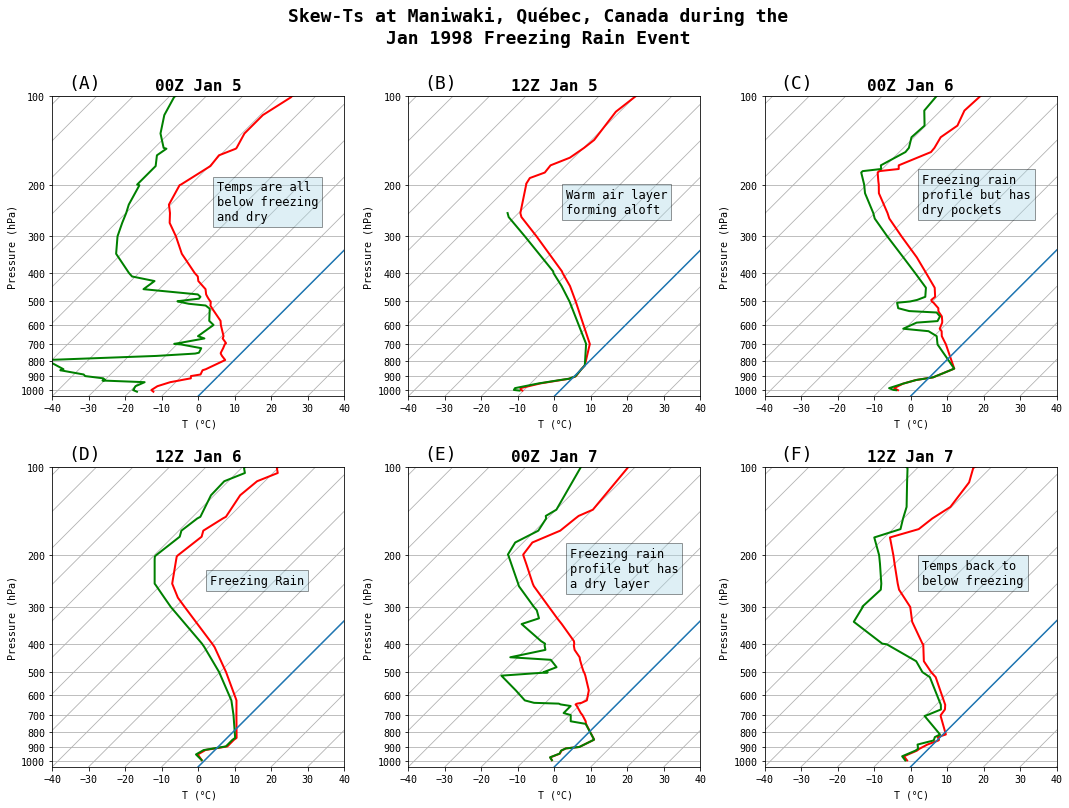

In [15]:
#make the figure
fig=plt.figure(figsize=(18, 12.5))
fig.subplots_adjust(wspace=0.22,hspace=0.2)

#grid for plots
gs = gridspec.GridSpec(2, 3)

#Set up skewT (Jan 5th 00Z)
skew1 = SkewT(fig, rotation=45, subplot=gs[0, 0])
skew1.plot(maniwaki_pres_jan5_00Z, maniwaki_temp_jan5_00Z, 'red', linewidth=2) #plot the air temperature
skew1.plot(maniwaki_pres_jan5_00Z, maniwaki_dwpt_jan5_00Z, 'green', linewidth=2) #plot the dewpoint
#labeling (Jan 5th 00Z)
plt.gca().set_xlim(-40,40)
plt.axvline(0, color='C0')
plt.title('00Z Jan 5',fontsize=16,fontweight='bold')
plt.xlabel('T ($\degree$C)')
plt.ylabel('Pressure (hPa)')
plt.text(-120, 94,'(A)',fontsize=18)
plt.text(-43, 265, 'Temps are all\nbelow freezing\nand dry',fontsize=12,
        bbox={'facecolor': 'lightblue', 'alpha': 0.4})

#Set up skewT (Jan 5th 12Z)
skew2 = SkewT(fig, rotation=45, subplot=gs[0, 1])
skew2.plot(maniwaki_pres_jan5_12Z, maniwaki_temp_jan5_12Z, 'red', linewidth=2) #plot the air temperature
skew2.plot(maniwaki_pres_jan5_12Z[0:18], maniwaki_dwpt_jan5_12Z[0:18], 'green', linewidth=2) #plot the dewpoint
#labeling (Jan 5th 12Z)
plt.gca().set_xlim(-40,40)
plt.axvline(0, color='C0')
plt.title('12Z Jan 5',fontsize=16,fontweight='bold')
plt.xlabel('T ($\degree$C)')
plt.ylabel('Pressure (hPa)')
plt.text(-120, 94,'(B)',fontsize=18)
plt.text(-47, 250, 'Warm air layer\nforming aloft',fontsize=12,
        bbox={'facecolor': 'lightblue', 'alpha': 0.4})

#Set up skewT (Jan 6th 00Z)
skew3 = SkewT(fig, rotation=45, subplot=gs[0, 2])
skew3.plot(maniwaki_pres_jan6_00Z, maniwaki_temp_jan6_00Z, 'red', linewidth=2) #plot the air temperature
skew3.plot(maniwaki_pres_jan6_00Z, maniwaki_dwpt_jan6_00Z, 'green', linewidth=2) #plot the dewpoint
#labeling (Jan 6th 00Z)
plt.gca().set_xlim(-40,40)
plt.axvline(0, color='C0')
plt.title('00Z Jan 6',fontsize=16,fontweight='bold')
plt.xlabel('T ($\degree$C)')
plt.ylabel('Pressure (hPa)')
plt.text(-120, 94,'(C)',fontsize=18)
plt.text(-47, 250, 'Freezing rain\nprofile but has\ndry pockets',fontsize=12,
        bbox={'facecolor': 'lightblue', 'alpha': 0.4})

#Set up skewT (Jan 6th 12Z)
skew4 = SkewT(fig, rotation=45, subplot=gs[1, 0])
skew4.plot(maniwaki_pres_jan6_12Z, maniwaki_temp_jan6_12Z, 'red', linewidth=2) #plot the air temperature
skew4.plot(maniwaki_pres_jan6_12Z, maniwaki_dwpt_jan6_12Z, 'green', linewidth=2) #plot the dewpoint
#labeling (Jan 6th 12Z)
plt.gca().set_xlim(-40,40)
plt.axvline(0, color='C0')
plt.title('12Z Jan 6',fontsize=16,fontweight='bold')
plt.xlabel('T ($\degree$C)')
plt.ylabel('Pressure (hPa)')
plt.text(-120, 94,'(D)',fontsize=18)
plt.text(-47, 250, 'Freezing Rain',fontsize=12,
        bbox={'facecolor': 'lightblue', 'alpha': 0.4})

#Set up skewT (Jan 7th 00Z)
skew5 = SkewT(fig, rotation=45, subplot=gs[1, 1])
skew5.plot(maniwaki_pres_jan7_00Z, maniwaki_temp_jan7_00Z, 'red', linewidth=2) #plot the air temperature
skew5.plot(maniwaki_pres_jan7_00Z, maniwaki_dwpt_jan7_00Z, 'green', linewidth=2) #plot the dewpoint
#labeling (Jan 7th 00Z)
plt.gca().set_xlim(-40,40)
plt.axvline(0, color='C0')
plt.title('00Z Jan 7',fontsize=16,fontweight='bold')
plt.xlabel('T ($\degree$C)')
plt.ylabel('Pressure (hPa)')
plt.text(-120, 94,'(E)',fontsize=18)
plt.text(-45, 257, 'Freezing rain\nprofile but has\na dry layer',fontsize=12,
        bbox={'facecolor': 'lightblue', 'alpha': 0.4})

#Set up skewT (Jan 7th 12Z)
skew6 = SkewT(fig, rotation=45, subplot=gs[1, 2])
skew6.plot(maniwaki_pres_jan7_12Z, maniwaki_temp_jan7_12Z, 'red', linewidth=2) #plot the air temperature
skew6.plot(maniwaki_pres_jan7_12Z, maniwaki_dwpt_jan7_12Z, 'green', linewidth=2) #plot the dewpoint
#labeling (Jan 7th 12Z)
plt.gca().set_xlim(-40,40)
plt.axvline(0, color='C0')
plt.title('12Z Jan 7',fontsize=16,fontweight='bold')
plt.xlabel('T ($\degree$C)')
plt.ylabel('Pressure (hPa)')
plt.text(-120, 94,'(F)',fontsize=18)
plt.text(-47, 250, 'Temps back to\nbelow freezing',fontsize=12,
        bbox={'facecolor': 'lightblue', 'alpha': 0.4})

#title
plt.suptitle('Skew-Ts at Maniwaki, Québec, Canada during the\nJan 1998 Freezing Rain Event',fontsize=18,
             fontweight='bold',y=0.975)

#save the figure
plt.savefig('skewTs.png', bbox_inches='tight', dpi=300)

These subplots are showing the progression of freezing rain during the Jan 1998 ice storm that hit the Northeastern U.S. and Southeastern Canada. In the beginning (Jan 5 00Z), the atmospheric temperature profile is dry and below freezing for freezing rain to occur. On Jan 5th 12Z, we see that a warm layer aloft is beginning to form. Jan 6th 00Z and Jan 6th 12Z exhibit freezing rain profiles, but are not as "strong", mainly because the location I chose is a little north of the main freezing rain event. On Jan 7th 00Z, a dry layer begins to form, and then by the end (Jan 7th 12Z) the temperatures return to sub-freezing.